## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how = "left" ,on = ["Mouse ID"])

# Preview the ombined_data
combined_data.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


## Summary statistics

In [2]:
#lets find out the duplicate values in the dataframe
duplicate_mouse = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [3]:
#locate the duplicate value for elimination
duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"]=='g989']

In [4]:
#Store the cleaned dataframe now
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse)==False]

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_stats = clean_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_stats = clean_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance_stats = clean_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_stats = clean_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem_stats = clean_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
summary_table = pd.DataFrame({"Mean Tumor Vol (mm3)":mean_stats , 
                              "Median Tumor Vol (mm3)": median_stats,
                              "Variance Tumor Vol (mm3)": variance_stats,
                              "Std Tumor Vol (mm3)": std_stats,
                              "Sem Tumor Vol (mm3)" :sem_stats
                              })

summary_table = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

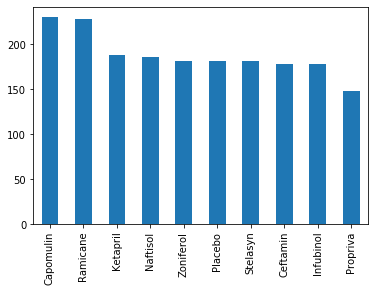

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
fig = clean_data["Drug Regimen"].value_counts()
fig.plot(kind = 'bar')



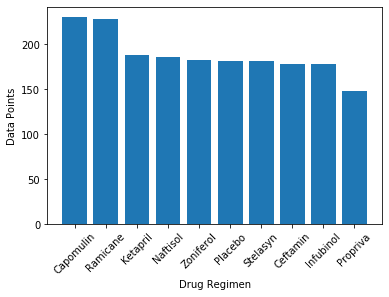

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

regimen_groups = clean_data['Drug Regimen'].value_counts()
plt.bar(regimen_groups.index.values,regimen_groups.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Data Points")
plt.show()
plt.tight_layout()

## Pie plots

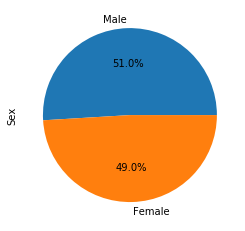

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_data.Sex.value_counts() 
counts.plot(kind = 'pie',autopct = '%1.1f%%')
plt.show()



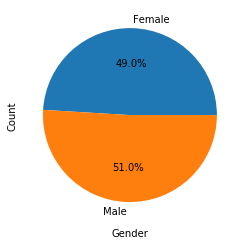

<Figure size 432x288 with 0 Axes>

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a group based on the values in the 'Sex' column
mice_group = clean_data.groupby('Sex')

# Count how many times each gender appears in our group
count_gender = mice_group['Sex'].count()

# Create a bar chart based off of the group series from before
count_chart = count_gender.plot(kind='pie',autopct = '%1.1f%%')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Gender")
count_chart.set_ylabel("Count")


plt.show()
plt.tight_layout()

## Quartiles, outliers and boxplots

C:\Users\getso\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\getso\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\getso\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\getso\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\getso\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


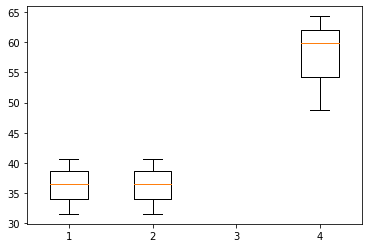

In [75]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
max_treatment = clean_data.groupby(["Mouse ID"]).max()
max_treatment = max_treatment.reset_index()
merge_data = max_treatment[["Mouse ID","Timepoint"]].merge(clean_data ,  on=["Mouse ID","Timepoint"] , how = "left") 
ramicane = merge_data.loc[merge_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
capumolin = merge_data.loc[merge_data["Drug Regimen"] == "Capumolin"]['Tumor Volume (mm3)']
propiva = merge_data.loc[merge_data["Drug Regimen"] == "Propiva"]['Tumor Volume (mm3)']
ceftamin = merge_data.loc[merge_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_lowerq + (1.5*ramicane_iqr)


capomulin_quartiles= capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_lowerq + (1.5*capomulin_iqr)

propiva_quartiles= propiva.quantile([.25,.5,.75])
propiva_lowerq = propiva_quartiles[0.25]
propiva_upperq = propiva_quartiles[0.75]
propiva_iqr = propiva_upperq - propiva_lowerq
propiva_lower_bound = propiva_lowerq - (1.5*propiva_iqr)
propiva_upper_bound = propiva_lowerq + (1.5*propiva_iqr)

ceftamin_quartiles= ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_lowerq + (1.5*ceftamin_iqr)

box_plot_data=[ramicane_quartiles,capumolin_quartiles,propiva_quartiles,ceftamin_quartiles]
plt.boxplot(box_plot_data)
plt.show()

## Line and scatter plots

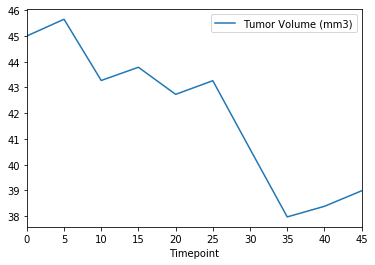

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#select a mouse treated with Capumolin
mouseTpoint = clean_data[clean_data["Mouse ID"]=="b128"]["Timepoint"]
mouseTVol = clean_data[clean_data["Mouse ID"] == "b128"]["Tumor Volume (mm3)"]

#concat above series to a dataframe
mouseTvol_df = pd.concat([mouseTpoint,mouseTVol],axis =1)

#plot for the dataframe indices
mouseTvol_df.plot.line( x = "Timepoint" , y = "Tumor Volume (mm3)")

In [82]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


#Avg tumor volume for capomulin 
avgTvol = clean_data[clean_data["Drug Regimen"]=="Capomulin"].mean() ["Tumor Volume (mm3)"]

#get the weights of the mice
miceWeight = clean_data["Weight (g)"]


In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


regression_data = st.linregress(summary_table['Weight (g)'],summary_table['Tumor Volume (mm3)'])
slope = regression_data.slope
intercept = regression_data.intercept
regression_line = Capomulin_mean['Weight (g)'] * slope + intercept
plt.plot(Capomulin_mean['Weight (g)'], regression_line, color="red")
plt.show()









NameError: name 'Capomulin_mean' is not defined